In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 6
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.2
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[6_10_51_300_0.2_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[6_10_51_300_0.2_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	608.4604

Best Fitness:	604.9491
Solution:	600.0000
Diff:		4.9491

[0:02:40][----------] 1.96% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	606.9863

Best Fitness:	604.5877
Solution:	600.0000
Diff:		4.5877

[0:04:45][----------] 3.92% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	606.4760

Best Fitness:	603.8354
Solution:	600.0000
Diff:		3.8354

[0:06:49][#---------] 5.88% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	608.5570

Best Fitness:	605.5828
Solution:	600.0000
Diff:		5.5828

[0:08:56][#---------] 7.84% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	607.0008

Best Fitness:	604.1195
Solution:	600.0000
Diff:		4.1195

[0:10:58][#---------] 9.80% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	606.5513

Best Fitness:	604.0542
Solution:	600.0000
Diff:		4.0542

[0:12:56][#---------] 11.76% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	606.8028

Best Fitness:	604.0894
Solution:	600.0000
Diff:		4.0894

[0:14:56][#---------] 13.73% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	605.8094

Best Fitness:	603.5348
Solution:	600.0000
Diff:		3.5348

[0:17:01][##--------] 15.69% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	610.3541

Best Fitness:	607.0823
Solution:	600.0000
Diff:		7.0823

[0:19:11][##--------] 17.65% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	609.7360

Best Fitness:	606.2203
Solution:	600.0000
Diff:		6.2203

[0:21:09][##--------] 19.61% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	608.2821

Best Fitness:	604.5311
Solution:	600.0000
Diff:		4.5311

[0:23:16][##--------] 21.57% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	608.7106

Best Fitness:	605.5525
Solution:	600.0000
Diff:		5.5525

[0:25:32][##--------] 23.53% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	608.5739

Best Fitness:	605.3717
Solution:	600.0000
Diff:		5.3717

[0:27:20][###-------] 25.49% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	608.4841

Best Fitness:	605.8437
Solution:	600.0000
Diff:		5.8437

[0:29:11][###-------] 27.45% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	607.7090

Best Fitness:	605.1297
Solution:	600.0000
Diff:		5.1297

[0:31:07][###-------] 29.41% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	606.9314

Best Fitness:	604.4480
Solution:	600.0000
Diff:		4.4480

[0:33:13][###-------] 31.37% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	607.9564

Best Fitness:	604.2459
Solution:	600.0000
Diff:		4.2459

[0:35:15][###-------] 33.33% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	608.0795

Best Fitness:	605.1351
Solution:	600.0000
Diff:		5.1351

[0:37:16][####------] 35.29% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	606.4640

Best Fitness:	604.0747
Solution:	600.0000
Diff:		4.0747

[0:39:16][####------] 37.25% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	609.1547

Best Fitness:	606.1164
Solution:	600.0000
Diff:		6.1164

[0:40:52][####------] 39.22% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	606.7420

Best Fitness:	604.4127
Solution:	600.0000
Diff:		4.4127

[0:42:40][####------] 41.18% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	607.7646

Best Fitness:	605.3348
Solution:	600.0000
Diff:		5.3348

[0:44:21][####------] 43.14% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	611.0982

Best Fitness:	607.4247
Solution:	600.0000
Diff:		7.4247

[0:46:01][#####-----] 45.10% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	609.2378

Best Fitness:	606.2800
Solution:	600.0000
Diff:		6.2800

[0:47:41][#####-----] 47.06% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	606.8469

Best Fitness:	604.2243
Solution:	600.0000
Diff:		4.2243

[0:49:23][#####-----] 49.02% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	608.4623

Best Fitness:	605.6976
Solution:	600.0000
Diff:		5.6976

[0:51:06][#####-----] 50.98% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	605.4733

Best Fitness:	603.6609
Solution:	600.0000
Diff:		3.6609

[0:52:44][#####-----] 52.94% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	608.8708

Best Fitness:	606.0738
Solution:	600.0000
Diff:		6.0738

[0:54:27][#####-----] 54.90% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	609.6019

Best Fitness:	605.5349
Solution:	600.0000
Diff:		5.5349

[0:56:10][######----] 56.86% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	607.6679

Best Fitness:	604.2796
Solution:	600.0000
Diff:		4.2796

[0:58:01][######----] 58.82% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	607.8083

Best Fitness:	605.3964
Solution:	600.0000
Diff:		5.3964

[0:59:54][######----] 60.78% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	608.8916

Best Fitness:	605.3911
Solution:	600.0000
Diff:		5.3911

[1:01:34][######----] 62.75% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	607.3308

Best Fitness:	603.6043
Solution:	600.0000
Diff:		3.6043

[1:03:18][######----] 64.71% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	605.6626

Best Fitness:	603.4367
Solution:	600.0000
Diff:		3.4367

[1:04:56][#######---] 66.67% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	607.4221

Best Fitness:	604.5627
Solution:	600.0000
Diff:		4.5627

[1:06:48][#######---] 68.63% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	604.9382

Best Fitness:	603.4644
Solution:	600.0000
Diff:		3.4644

[1:08:26][#######---] 70.59% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	607.5024

Best Fitness:	604.9894
Solution:	600.0000
Diff:		4.9894

[1:10:06][#######---] 72.55% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	606.5955

Best Fitness:	604.0092
Solution:	600.0000
Diff:		4.0092

[1:11:47][#######---] 74.51% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	609.0362

Best Fitness:	605.9017
Solution:	600.0000
Diff:		5.9017

[1:13:42][########--] 76.47% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	607.4305

Best Fitness:	604.4600
Solution:	600.0000
Diff:		4.4600

[1:15:32][########--] 78.43% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	606.2528

Best Fitness:	603.4584
Solution:	600.0000
Diff:		3.4584

[1:17:24][########--] 80.39% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	606.7199

Best Fitness:	604.4961
Solution:	600.0000
Diff:		4.4961

[1:19:00][########--] 82.35% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	607.9794

Best Fitness:	605.6287
Solution:	600.0000
Diff:		5.6287

[1:20:36][########--] 84.31% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	608.4554

Best Fitness:	605.2674
Solution:	600.0000
Diff:		5.2674

[1:22:12][#########-] 86.27% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	606.2854

Best Fitness:	604.4450
Solution:	600.0000
Diff:		4.4450

[1:23:48][#########-] 88.24% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	609.3962

Best Fitness:	605.8339
Solution:	600.0000
Diff:		5.8339

[1:25:37][#########-] 90.20% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	606.0939

Best Fitness:	604.0973
Solution:	600.0000
Diff:		4.0973

[1:27:21][#########-] 92.16% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	606.6179

Best Fitness:	603.8606
Solution:	600.0000
Diff:		3.8606

[1:29:04][#########-] 94.12% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	609.6253

Best Fitness:	606.4316
Solution:	600.0000
Diff:		6.4316

[1:30:56][##########] 96.08% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	607.1252

Best Fitness:	604.8973
Solution:	600.0000
Diff:		4.8973

[1:32:51][##########] 98.04% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	608.0385

Best Fitness:	605.2968
Solution:	600.0000
Diff:		5.2968

[1:34:29][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

1:34:29

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
60,9.167663,8.30034,9.30039,9.185888,10.686408,9.232764,7.502704,8.803628,6.286813,9.590551,...,8.213127,9.382346,9.420691,8.106734,8.041514,8.173451,7.346086,9.405950,7.693423,50
61,8.728353,8.30034,9.30039,9.185888,10.686408,9.232764,7.502704,8.803628,6.286813,9.590551,...,8.213127,9.382346,9.420691,6.142812,8.041514,8.173451,7.346086,9.405950,7.693423,50
62,8.728353,8.30034,9.30039,9.185888,9.673675,9.232764,7.502704,8.803628,6.286813,9.590551,...,8.213127,9.382346,9.420691,6.142812,8.041514,8.173451,7.346086,9.405950,7.693423,50
63,8.728353,8.30034,9.30039,9.185888,9.673675,9.232764,7.502704,8.803628,6.286813,9.590551,...,8.213127,9.382346,9.420691,6.142812,8.041514,8.173451,7.346086,9.405950,7.693423,50
64,8.292026,8.30034,9.30039,9.185888,9.673675,9.232764,7.502704,8.803628,6.286813,9.590551,...,8.213127,9.382346,9.420691,6.142812,8.041514,8.173451,7.346086,8.879008,7.693423,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 4.949147670294906

Best error for run 1: 4.58766599114233

Best error for run 2: 3.8354344083875276

Best error for run 3: 5.58283509976161

Best error for run 4: 4.119549150608464

Best error for run 5: 4.054173797121166

Best error for run 6: 4.089421700094363

Best error for run 7: 3.5347994966274427

Best error for run 8: 7.082290747851403

Best error for run 9: 6.220297843007529

Best error for run 10: 4.531095957849175

Best error for run 11: 5.552455433023056

Best error for run 12: 5.371669638831236

Best error for run 13: 5.843682230773766

Best error for run 14: 5.129717278193198

Best error for run 15: 4.448049706314464

Best error for run 16: 4.2459435492289685

Best error for run 17: 5.135050273600996

Best error for run 18: 4.074722236441971

Best error for run 19: 6.116411894651947

Best error for run 20: 4.41272807964765

Best error for run 21: 5.33484865639366

Best error for run 22: 7.424711908163999

Best error for run 23: 6.279986332765702

Best error for run 24: 4.22427309339821

Best error for run 25: 5.697599407420739

Best error for run 26: 3.660877359135725

Best error for run 27: 6.073831800753055

Best error for run 28: 5.534852348055892

Best error for run 29: 4.279597766215829

Best error for run 30: 5.3964376661811

Best error for run 31: 5.391050148312729

Best error for run 32: 3.6043145704073822

Best error for run 33: 3.436664227856113

Best error for run 34: 4.562729856479336

Best error for run 35: 3.464388182421203

Best error for run 36: 4.989437726633014

Best error for run 37: 4.009161760069446

Best error for run 38: 5.9016769862579395

Best error for run 39: 4.45995206363682

Best error for run 40: 3.4584050100116883

Best error for run 41: 4.496099838968348

Best error for run 42: 5.6287170520405425

Best error for run 43: 5.26736359405777

Best error for run 44: 4.444997431534034

Best error for run 45: 5.833929179176266

Best error for run 46: 4.097259495273761

Best error for run 47: 3.860592650104877

Best error for run 48: 6.431639451190449

Best error for run 49: 4.897327053125423

Best error for run 50: 5.296822847798012

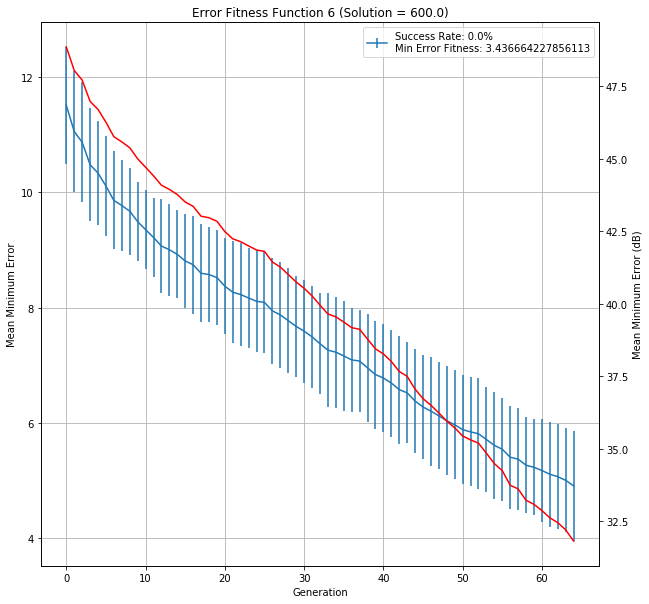

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[6_10_51_300_0.2_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,6,10,0.2,4.949148,4.587666,3.835434,5.582835,4.119549,4.054174,...,4.444997,5.833929,4.097259,3.860593,6.431639,4.897327,5.296823,4.908955,1:34:29,20100
